In [1]:
#CSV Details:

#it has just product as "bank_account_or_service"

In [2]:
##for better understanding, we have considered just 'Bank account or service', as of now

In [3]:
#predict the issue based on consumer complaint narrative

In [4]:
#where issue related to 'Account opening, closing, or management' are considered to be 1 and rest ( 'Deposits and withdrawals','Using a debit or ATM card',

In [5]:
#Building a Model to predict the "issue"- either 1 or 0 based on "Consumer Complaint Narrative"

In [76]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [8]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [9]:
stopword = nltk.corpus.stopwords.words('english')

In [10]:
#Functions used :
#Label Encoding
#Punctuation Removal
#Number Removal
#Tokenizing
#Lower Case Conversion
#Stop words
#Token Concatenation

In [11]:
#Label Encoding 

In [12]:
def label_encoding(i):
    if i == 'Account opening, closing, or management':
        return 1
    else :
        return 0

In [13]:
#Punctuation Removal

In [14]:
def remove_punctuation(text):
    words = [word for word in text if word not in string.punctuation]
    text = ''.join(words)
    return text

In [15]:
#Number Removal

In [16]:
def remove_numbers(text):
    words = [word for word in text if not word.isdigit()]
    text = ''.join(words)
    return text

In [17]:
#Lower Case Conversion

In [18]:
def convert_to_lower(tokens):
    tokens=[word.lower() for word in tokens]
    return tokens

In [19]:
#Stopwords

In [20]:
def remove_stopwords(tokens):
    tokens=[word for word in tokens if word not in stopword]
    return tokens


In [21]:
#Token Concatenation

In [22]:
def concate_tokens(token):
    sentance = ''
    for i in token:
        sentance = sentance+i+' '
    return sentance    

In [23]:
CV = CountVectorizer()

In [25]:
df = pd.read_csv("bank_account_or_service.csv",index_col=0,error_bad_lines=False)

In [26]:
df.shape

(5711, 18)

In [27]:
df.columns

Index(['date_received', 'product', 'sub_product', 'issue', 'sub_issue',
       'consumer_complaint_narrative', 'company_public_response', 'company',
       'state', 'zipcode', 'tags', 'consumer_consent_provided',
       'submitted_via', 'date_sent_to_company', 'company_response_to_consumer',
       'timely_response', 'consumer_disputed?', 'complaint_id'],
      dtype='object')

In [28]:
pd.set_option("display.max_colwidth", None)

In [29]:
df.issue.unique()

array(['Deposits and withdrawals',
       'Account opening, closing, or management',
       'Using a debit or ATM card',
       'Problems caused by my funds being low',
       'Making/receiving payments, sending money'], dtype=object)

In [30]:
df_new1 = df[["issue","consumer_complaint_narrative"]]

In [31]:
df_new1['consumer_complaint_narrative'] =  df.consumer_complaint_narrative.apply(lambda i : str(i) )

In [32]:
df_new1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5711 entries, 192044 to 553037
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   issue                         5711 non-null   object
 1   consumer_complaint_narrative  5711 non-null   object
dtypes: object(2)
memory usage: 133.9+ KB


In [33]:
df_new1['issue'].value_counts()

Account opening, closing, or management     2228
Deposits and withdrawals                    1401
Problems caused by my funds being low        918
Using a debit or ATM card                    619
Making/receiving payments, sending money     545
Name: issue, dtype: int64

In [34]:
df_new1['target'] = df_new1['issue'].map(label_encoding)

In [35]:
df_new1.target.value_counts()

0    3483
1    2228
Name: target, dtype: int64

In [36]:
df_new1['narrative_wo_punct'] = df_new1['consumer_complaint_narrative'].map(remove_punctuation)

In [37]:
df_new1['narrative_wo_punct'].head(1)

192044    I opened an account with M  T bank online on XXXXXXXX15 and immediately funded it with an automated transfer of 50000 A little over a week later I got a letter requesting that I fax in a copy of my DL Social and utility bill for address verification which I did on XXXXXXXX15 Fast forward to today XXXXXXXX15 and I have not heard anything back so I called M  T bank to find out the status and I was told that they still have not reviewed it and my 50000 was on hold I demanded that my account get shut down and my 50000 returned but I was told that could not happen until they reviewed my information that was faxed and released the hold on my account I asked how long that would take and I was told it would take as long as they want which would render my 50000 hostage until they got around to figuring stuff out \n
Name: narrative_wo_punct, dtype: object

In [38]:
df_new1['narrative_wo_numbers'] = df_new1['narrative_wo_punct'].map(remove_numbers)

In [39]:
df_new1['narrative_wo_numbers'].head(1)

192044    I opened an account with M  T bank online on XXXXXXXX and immediately funded it with an automated transfer of  A little over a week later I got a letter requesting that I fax in a copy of my DL Social and utility bill for address verification which I did on XXXXXXXX Fast forward to today XXXXXXXX and I have not heard anything back so I called M  T bank to find out the status and I was told that they still have not reviewed it and my  was on hold I demanded that my account get shut down and my  returned but I was told that could not happen until they reviewed my information that was faxed and released the hold on my account I asked how long that would take and I was told it would take as long as they want which would render my  hostage until they got around to figuring stuff out \n
Name: narrative_wo_numbers, dtype: object

In [40]:
df_new1['tokens'] = df_new1['narrative_wo_numbers'].map(word_tokenize)


In [41]:
df_new1['tokens'].head(1)

192044    [I, opened, an, account, with, M, T, bank, online, on, XXXXXXXX, and, immediately, funded, it, with, an, automated, transfer, of, A, little, over, a, week, later, I, got, a, letter, requesting, that, I, fax, in, a, copy, of, my, DL, Social, and, utility, bill, for, address, verification, which, I, did, on, XXXXXXXX, Fast, forward, to, today, XXXXXXXX, and, I, have, not, heard, anything, back, so, I, called, M, T, bank, to, find, out, the, status, and, I, was, told, that, they, still, have, not, reviewed, it, and, my, was, on, hold, I, demanded, that, my, account, get, shut, down, and, ...]
Name: tokens, dtype: object

In [42]:
df_new1['tokens_to_lower'] = df_new1['tokens'].map(convert_to_lower)

In [43]:
df_new1['tokens_to_lower'].head(1)

192044    [i, opened, an, account, with, m, t, bank, online, on, xxxxxxxx, and, immediately, funded, it, with, an, automated, transfer, of, a, little, over, a, week, later, i, got, a, letter, requesting, that, i, fax, in, a, copy, of, my, dl, social, and, utility, bill, for, address, verification, which, i, did, on, xxxxxxxx, fast, forward, to, today, xxxxxxxx, and, i, have, not, heard, anything, back, so, i, called, m, t, bank, to, find, out, the, status, and, i, was, told, that, they, still, have, not, reviewed, it, and, my, was, on, hold, i, demanded, that, my, account, get, shut, down, and, ...]
Name: tokens_to_lower, dtype: object

In [44]:
df_new1['wo_stopwords'] = df_new1['tokens_to_lower'].map(remove_stopwords)

In [45]:
df_new1.wo_stopwords.tail(1)

553037    [bank, america, extended, overdraft, fee, ended, penalizing, overdraft, accept, original, fee, since, error, fault, however, nt, bank, america, guilty, charging, excessive, fees, bank, years, bank, see, payroll, occurs, biweekly, deposit, social, security, check, xxxx, month, overdraft, occurred, xxxxxxxx, since, xxxx, check, wo, nt, deposit, xxxxxxxx, way, avoid, extended, fee, current, balance]
Name: wo_stopwords, dtype: object

In [46]:
df_new1['final_text'] = df_new1['wo_stopwords'].map(concate_tokens)

In [47]:
df_new1.final_text.head(1)


192044    opened account bank online xxxxxxxx immediately funded automated transfer little week later got letter requesting fax copy dl social utility bill address verification xxxxxxxx fast forward today xxxxxxxx heard anything back called bank find status told still reviewed hold demanded account get shut returned told could happen reviewed information faxed released hold account asked long would take told would take long want would render hostage got around figuring stuff 
Name: final_text, dtype: object

In [48]:
#Independent and Target Variables

In [49]:
features_var = df_new1.final_text
target_var = df_new1.target

In [50]:
xtrain, xtest, ytrain, ytest = train_test_split(features_var,target_var, test_size=.2,random_state=100)

In [51]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4568,), (1143,), (4568,), (1143,))

In [52]:
toNumeric = CountVectorizer()

In [53]:
#Get the vocabulary(unique words) from training data
toNumeric.fit(xtrain)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [54]:
# Test the created vocabulary
len(toNumeric.get_feature_names())

15652

In [55]:
# Convert training data into a 'document-term matrix'
sampleTrain_dtm = toNumeric.transform(xtrain)
sampleTrain_dtm

<4568x15652 sparse matrix of type '<class 'numpy.int64'>'
	with 313194 stored elements in Compressed Sparse Row format>

In [56]:
# Let's convert sparse matrix to a dense matrix
sampleTrain_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [57]:
pd.DataFrame(sampleTrain_dtm.toarray(), columns=toNumeric.get_feature_names()).head(1)

,aaccount,aacount,aba,aback,aballished,abandon,abandoned,abank,abarouting,abatement,abc,abd,abetted,abetting,abide,abided,abiding,abilities,ability,abillionaire,able,ableto,abm,abnormality,abnormally,abominably,abomination,abort,abortive,abother,aboutwhere,abovementioned,abovethen,abrasive,abrasiveness,abreast,abroad,abrubtly,abrupt,abruptly,...,yhat,yield,yielded,yiu,yo,york,yorki,yorksince,youamex,young,younger,youraccount,yourbusiness,yourcomputer,youre,yourpayment,youshall,yousincerelyxxxx,youth,youto,youtoday,youve,youxxxx,youxxxxxxxx,yr,yrs,yuck,yur,yused,yyour,zed,zero,zeroed,zeros,zi,zion,zions,zip,zippered,zone
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Using KNN Classifier

In [58]:
model1 = KNeighborsClassifier(n_neighbors=5)
model1.fit(sampleTrain_dtm, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [59]:
# Transform test data into DTM by using generated vocabulary
sampleTest_dtm = toNumeric.transform(xtest)
len(sampleTest_dtm.toarray())

1143

In [61]:
# Test built model
y_pred_test = model1.predict(sampleTest_dtm)

In [62]:
y_pred_test.shape

(1143,)

In [63]:
ytest.shape

(1143,)

In [64]:
print(classification_report(ytest, y_pred_test))

              precision    recall  f1-score   support

           0       0.71      0.79      0.75       717
           1       0.57      0.46      0.51       426

    accuracy                           0.67      1143
   macro avg       0.64      0.63      0.63      1143
weighted avg       0.66      0.67      0.66      1143



In [65]:
df_output = pd.DataFrame({
    'y actual' : ytest,
    ' y predicted _test' : y_pred_test
})

In [66]:
df_output.head(5)

,y actual,y predicted _test
228491,1,0
317301,1,0
533005,1,1
308706,0,0
324088,1,1


In [67]:
for i in df_output.columns:
  print(i,df_output[i].value_counts(),sep="\n")

y actual
0    717
1    426
Name: y actual, dtype: int64
 y predicted _test
0    799
1    344
Name:  y predicted _test, dtype: int64


In [68]:
tuned_paramaters = {'n_neighbors': np.arange(1, 25, 2),
                   'metric': ['hamming','euclidean','manhattan','Chebyshev'],
                    "weights":["uniform", "distance"]}
knn_classification = KNeighborsClassifier()
knn_grid = GridSearchCV(estimator = knn_classification, 
                        param_grid = tuned_paramaters, 
                        cv = 5, 
                        scoring = 'accuracy',verbose=2)

# fit the model on X_train and y_train using fit()
knn_grid.fit(sampleTrain_dtm, ytrain)

# get the best parameters
print('Best parameters for KNN Classifier: ', knn_grid.best_params_, '\n')

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=1, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=distance .................
[CV] .. metric=hamming, n_neighbors=1, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=1, weights=distance .................
[CV] .. metric=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ... metric=hamming, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=uniform ..................
[CV] ... metric=hamming, n_neighbors=9, weights=uniform, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=distance .................
[CV] .. metric=hamming, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=distance .................
[CV] .. metric=hamming, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=distance .................
[CV] .. metric=hamming, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=distance .................
[CV] .. metric=hamming, n_neighbors=9, weights=distance, total=   0.0s
[CV] metric=hamming, n_neighbors=9, weights=distance .................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  5.7min finished


In [74]:
#Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}

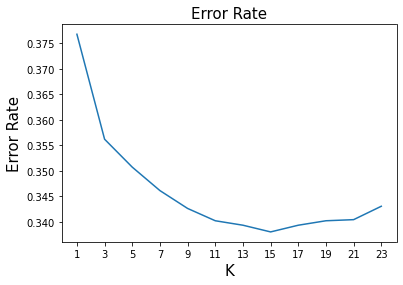

In [78]:
# consider an empty list to store error rate
error_rate = []

# use for loop to build a knn model for each K
for i in np.arange(1,25,2):
    
    # setup a knn classifier with k neighbors
    # use the 'euclidean' metric 
    knn = KNeighborsClassifier(i, metric = 'euclidean',weights="distance")
   
    # fit the model using 'cross_val_score'
    # pass the knn model as 'estimator'
    # use 5-fold cross validation
    score = cross_val_score(knn, sampleTrain_dtm, ytrain, cv = 5)
    
    # calculate the mean score
    score = score.mean()
    
    # compute error rate 
    error_rate.append(1 - score)

# plot the error_rate for different values of K 
plt.plot(range(1,25,2), error_rate)

# add plot and axes labels
# set text size using 'fontsize'
plt.title('Error Rate', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Error Rate', fontsize = 15)

# set the x-axis labels
plt.xticks(np.arange(1, 25, step = 2))

# plot a vertical line across the minimum error rate
#plt.axvline(x = 7, color = 'red')

# display the plot
plt.show()

In [79]:
#Best parameters for KNN Classifier:  {'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'distance'}
model2 = KNeighborsClassifier(n_neighbors=15)
model2.fit(sampleTrain_dtm, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [80]:
# Transform test data into DTM by using generated vocabulary
sampleTest_dtm = toNumeric.transform(xtest)
len(sampleTest_dtm.toarray())

1143

In [81]:
# Test built model
y_pred_test_2 = model2.predict(sampleTest_dtm)

In [82]:
y_pred_test_2.shape

(1143,)

In [83]:
ytest.shape

(1143,)

In [84]:
print(classification_report(ytest, y_pred_test_2))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       717
           1       0.60      0.41      0.49       426

    accuracy                           0.68      1143
   macro avg       0.65      0.62      0.63      1143
weighted avg       0.67      0.68      0.66      1143



In [85]:
df_output = pd.DataFrame({
    'y actual' : ytest,
    ' y predicted 1' : y_pred_test,
    ' y predicted 2' : y_pred_test_2
})

In [86]:
df_output.tail(5)

,y actual,y predicted 1,y predicted 2
543992,1,1,0
221036,0,0,0
316889,1,0,0
231891,0,0,0
505925,1,1,1


In [87]:
for i in df_output.columns:
  print(i,df_output[i].value_counts(1),sep="\n")

y actual
0    0.627297
1    0.372703
Name: y actual, dtype: float64
 y predicted 1
0    0.699038
1    0.300962
Name:  y predicted 1, dtype: float64
 y predicted 2
0    0.748031
1    0.251969
Name:  y predicted 2, dtype: float64


Using MultinomialNB

In [88]:
nb = MultinomialNB()
nb.fit(sampleTrain_dtm, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [90]:
y_pred_class_1 = nb.predict(sampleTest_dtm)

In [91]:
print(classification_report(ytest, y_pred_class_1))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       717
           1       0.71      0.69      0.70       426

    accuracy                           0.78      1143
   macro avg       0.76      0.76      0.76      1143
weighted avg       0.78      0.78      0.78      1143



In [92]:
df_output = pd.DataFrame({
    'y actual' : ytest,
    ' y predicted 1' : y_pred_class_1,
})

In [93]:
df_output.tail(10)

,y actual,y predicted 1
236016,1,1
243878,1,1
274025,0,0
262182,1,1
258583,0,0
543992,1,1
221036,0,0
316889,1,0
231891,0,0
505925,1,1


Using DecisionTreeClassifier

In [94]:
dt_1 = DecisionTreeClassifier()
dt_1.fit(sampleTrain_dtm, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [95]:
y_pred_dt_1 = dt_1.predict(sampleTest_dtm)

In [96]:
print('Classification Report:',classification_report(ytest,y_pred_dt_1),sep="\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       717
           1       0.58      0.61      0.59       426

    accuracy                           0.69      1143
   macro avg       0.67      0.67      0.67      1143
weighted avg       0.69      0.69      0.69      1143



Using Random Forest Classifier

In [97]:
RF = RandomForestClassifier()
RF.fit(sampleTrain_dtm, ytrain)
y_pred_RF = RF.predict(sampleTest_dtm)
print('Classification Report:',classification_report(ytest,y_pred_RF),sep="\n")


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       717
           1       0.76      0.55      0.64       426

    accuracy                           0.77      1143
   macro avg       0.77      0.73      0.74      1143
weighted avg       0.77      0.77      0.76      1143



In [99]:
# tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
#                      'max_depth': range(2, 10),
#                      'max_features': ["sqrt", "log2"],
#                      'min_samples_split': range(2,10),
#                      'min_samples_leaf': range(1,10),
#                      'max_leaf_nodes': range(1, 10)}]
 
# # instantiate the 'DecisionTreeClassifier' 
# # pass the 'random_state' to obtain the same samples for each time you run the code
# decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# # use GridSearchCV() to find the optimal value of the hyperparameters
# # estimator: pass the decision tree classifier model
# # param_grid: pass the list 'tuned_parameters'
# # cv: number of folds in k-fold i.e. here cv = 5
# tree_grid = GridSearchCV(estimator = decision_tree_classification, 
#                          param_grid = tuned_paramaters, 
#                          cv = 5)

# # fit the model on X_train and y_train using fit()
# tree_grid_model = tree_grid.fit(sampleTrain_dtm, ytrain)

# # get the best parameters
# print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

In [ ]:
# instantiate the 'DecisionTreeClassifier'
# 'best_params_' returns the dictionary containing best parameter values and parameter name  
# 'get()' returns the value of specified parameter
# pass the 'random_state' to obtain the same samples for each time you run the code
dt_model = DecisionTreeClassifier(criterion = tree_grid_model.best_params_.get('criterion'),
                                  max_depth = tree_grid_model.best_params_.get('max_depth'),
                                  max_features = tree_grid_model.best_params_.get('max_features'),
                                  max_leaf_nodes = tree_grid_model.best_params_.get('max_leaf_nodes'),
                                  min_samples_leaf = tree_grid_model.best_params_.get('min_samples_leaf'),
                                  min_samples_split = tree_grid_model.best_params_.get('min_samples_split'),
                                  random_state = 10)

# use fit() to fit the model on the train set
dt_model = dt_model.fit(sampleTrain_dtm, ytrain)

In [ ]:
y_pred_RF2 = dt_model.predict(sampleTest_dtm)
print('Accuracy:',accuracy_score(ytest,y_pred_RF2))
print()
print('Classification Report:',classification_report(ytest,y_pred_RF2),sep="\n")

Accuracy: 0.603448275862069

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.94      0.75       178
           1       0.41      0.06      0.11       112

    accuracy                           0.60       290
   macro avg       0.51      0.50      0.43       290
weighted avg       0.54      0.60      0.50       290

